# HW 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


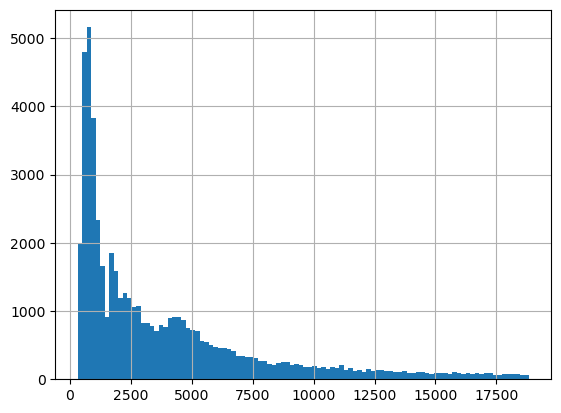

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[0.05197505, 0.75      , 0.83333333, ..., 0.45623836, 0.08285229,
        0.09685535],
       [0.31185031, 1.        , 0.33333333, ..., 0.7122905 , 0.12852292,
        0.14937107],
       [0.07068607, 1.        , 0.16666667, ..., 0.49068901, 0.08981324,
        0.10062893],
       ...,
       [0.07276507, 0.5       , 0.33333333, ..., 0.49255121, 0.09032258,
        0.10125786],
       [0.07068607, 1.        , 0.33333333, ..., 0.49068901, 0.08913413,
        0.10125786],
       [0.03950104, 0.75      , 0.5       , ..., 0.44134078, 0.07962649,
        0.09025157]])

In [12]:
y_train

array([[ 1013],
       [17360],
       [ 1440],
       ...,
       [ 1853],
       [ 2333],
       [ 1009]], dtype=int64)

# Обучаем модель линейной регрессии

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [15]:
y_pred = reg.predict(X_test)

In [16]:
print(y_pred)

[[  952.92329649]
 [  132.70712294]
 [   -6.8103842 ]
 ...
 [-1392.02480418]
 [ 5203.97188413]
 [ 1248.86641597]]


In [17]:
score = r2_score(y_pred, y_test)

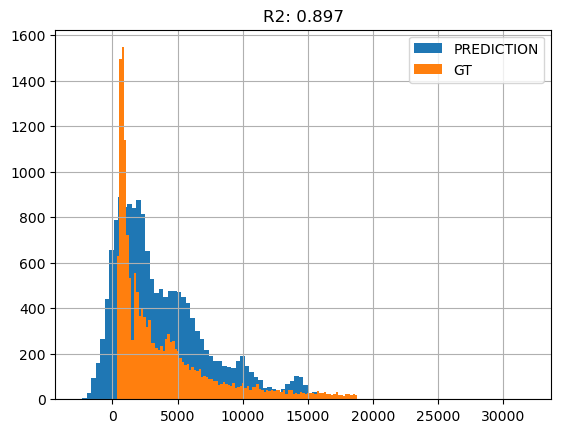

In [18]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [19]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """
    def __init__(self, learning_rate=0.01, n_iter=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.batch_size=batch_size

    def fit(self, X, y):
        str_num = X.shape[0]
        X = np.c_[np.ones((str_num, 1)), X]
        col_num = X.shape[1]
        
        self.weights = np.ones(col_num)
        for i in range(self.n_iter):
            for batch in range(0, str_num, self.batch_size):
                x_batch = X[batch:min(batch+self.batch_size, str_num)]
                y_batch = y[batch:min(batch+self.batch_size, str_num)].reshape(-1)

                grad_w = (2/len(y_batch))*np.dot(x_batch.T, np.dot(x_batch, self.weights)-y_batch)
                self.weights -=self.learning_rate*grad_w 
        return self

    def predict(self, X):
        str_num = X.shape[0]
        X = np.c_[np.ones((str_num, 1)), X]
        return np.dot(X, self.weights)

    def get_params(self):
        return self.weights


In [20]:
reg = LinearRegressorGD().fit(X_train, y_train)

In [21]:
y_pred = reg.predict(X_test)

In [22]:
print(y_pred)

[  981.03133299   160.71738052    23.71770293 ... -1368.59664716
  5243.02223026  1273.95304347]


In [23]:
score = r2_score(y_pred, y_test)

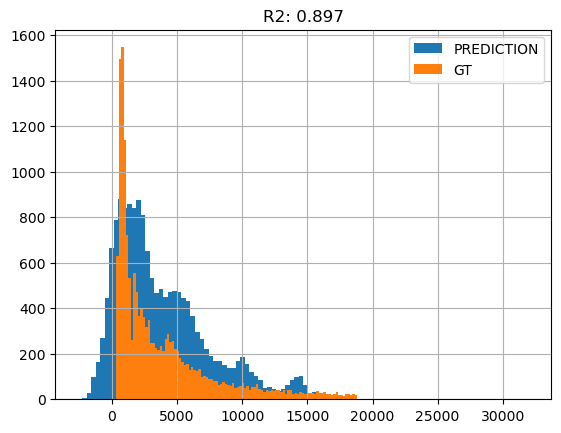

In [24]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации нужно использовать Sigmoid

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [25]:
class MLPRegressor:

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.0001, n_iter=100):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.outputs = []
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
        
    def sigmoid_proizvodnaya(self, z):
        return z * (1 - z)

    def update_weights(self, gradients):
        for i in range(len(self.weights)):
            self.weights[i]-=self.learning_rate * gradients[i]
        
    def forward(self, X):
        self.outputs = [X]
        prev = X
        for layer in range(len(self.weights)-1):
            prev = self.sigmoid(np.dot(prev, self.weights[layer]))
            self.outputs.append(prev)
        y_pred = np.dot(prev, self.weights[-1])  
        self.outputs.append(y_pred)
        return y_pred
    
    def backward(self, X, error):
        str_num = X.shape[0]
        grad = [np.zeros_like(weight) for weight in self.weights]
        grad[-1] = np.dot(self.outputs[-2].T, error) / str_num
    
        for l in range(len(self.weights)-2, -1, -1):
            error = np.dot(error, self.weights[l+1].T) * self.sigmoid_proizvodnaya(self.outputs[l+1])
            grad[l] = np.dot(self.outputs[l].T, error) / str_num
        self.update_weights(grad)

    
    def fit(self, X, y):
        str_num = X.shape[0]
        X = np.c_[np.ones((str_num, 1)), X]
        col_num = X.shape[1]
        prev = col_num
        self.weights = []
        for i_layer_weights in self.hidden_layer_sizes:
            self.weights.append(np.random.randn(prev, i_layer_weights) * 0.001)
            prev = i_layer_weights
        self.weights.append(np.random.randn(prev, 1) * 0.001)
        
        for i in range(self.n_iter):
            y_pred = self.forward(X)
            error = np.mean((y - y_pred) ** 2)
            self.backward(X, y_pred-y)
            print(f"epoch {i}, mse: {error}")
        return self

    def predict(self, X):
        str_num = X.shape[0]
        X = np.c_[np.ones((str_num, 1)), X]
        col_num = X.shape[1]
        return self.forward(X)

In [26]:
reg = MLPRegressor(n_iter = 2000).fit(X_train, y_train)

epoch 0, mse: 31527561.527902473
epoch 1, mse: 31449645.75782626
epoch 2, mse: 31368045.02424961
epoch 3, mse: 31274631.79483648
epoch 4, mse: 31161120.176579088
epoch 5, mse: 31019640.85306654
epoch 6, mse: 30844784.92487538
epoch 7, mse: 30636376.22956901
epoch 8, mse: 30400400.741374314
epoch 9, mse: 30146326.240280263
epoch 10, mse: 29883053.277921624
epoch 11, mse: 29616811.69547556
epoch 12, mse: 29351271.914022073
epoch 13, mse: 29088414.983170502
epoch 14, mse: 28829269.550203755
epoch 15, mse: 28574357.52163362
epoch 16, mse: 28323933.073068254
epoch 17, mse: 28078106.462273408
epoch 18, mse: 27836908.46885702
epoch 19, mse: 27600324.708008055
epoch 20, mse: 27368314.468790133
epoch 21, mse: 27140821.40202366
epoch 22, mse: 26917779.78427619
epoch 23, mse: 26699118.303542208
epoch 24, mse: 26484762.4125599
epoch 25, mse: 26274635.82920475
epoch 26, mse: 26068661.51454781
epoch 27, mse: 25866762.322576784
epoch 28, mse: 25668861.438492652
epoch 29, mse: 25474882.677817184
epoch

In [318]:
y_pred = reg.predict(X_test)

In [319]:
y_pred

array([[3950.20470404],
       [3950.20470444],
       [3950.20464521],
       ...,
       [3950.20470439],
       [3950.20470446],
       [3950.20470385]])

In [320]:
score = r2_score(y_pred, y_test)
score

-5.045941305515682e+16

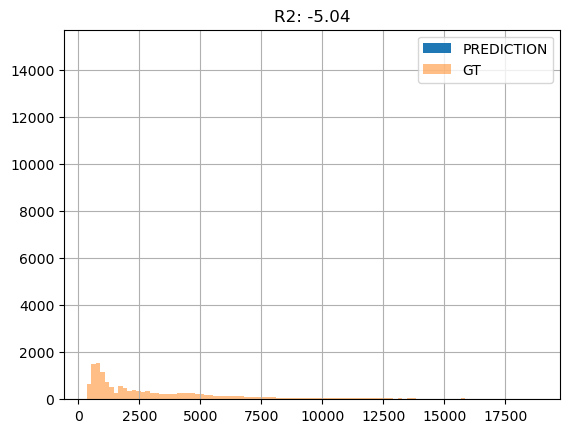

In [321]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, alpha=0.5, label='GT')
plt.legend()
plt.grid();

In [256]:
"""
class Neuron:
    def __init__(self, n, weights=np.zeros(n)):
        self.weights = weights
        self.x_transformed = None
    def changeWeights(self, new_weights):
        self.weights = new_weights
    def getWeights(self):
        return self.weights
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def forward_neuron(self, X):
        self.x_transformed = self.sigmoid(np.dot(X, self.weights))
        return self.x_transformed

class Layer:
    def __init__(self, n, num_of_neuro = 0):
        self.neurons = []
        self.num_of_neuro = num_of_neuro
        self.n = n
        for neuro in range(self.num_of_neuro):    
            self.neurons.append(Neuron(self.n))
    def forward_layer(self, X):
        for neuro in self.neurons:    
            neuro.forward_neuron(X)
        return self.neurons
            
class MLPRegressor:
    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate

        self.pred = None
        self.layers = []
        self.n_iter = n_iter

    def forward(self, X):
        str_num = X.shape[0]
        col_num = X.shape[1]
        first_layer = X
        for layer in self.layers:
            layer.forward_layer(first_layer)
            first_layer = layer.neurons
        return first_layer

    def backward(self, X, y):
        X = np.c_[np.ones((str_num, 1)), X]
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        

    def fit(self, X, y):
        str_num = X.shape[0]
        X = np.c_[np.ones((str_num, 1)), X]
        col_num = X.shape[1]
        for neuro_num_in_layer in self.hidden_layer_sizes:
            self.layers.append(Layer(col_num, neuro_num_in_layer))
        for i in range(self.n_iter):
            y_pred = self.forward(X)
            error = y-y_pred

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        pass
"""

IndentationError: unexpected indent (3171644896.py, line 50)